<a href="https://colab.research.google.com/github/Gladybams/Projet_fraude/blob/master/ProjetFraudeGlady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*On importe les librairies usuelles* 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

#*On charge et visionne le dataset*

In [0]:
dataset = pd.read_csv("fraud_data_country.csv")

*On renomme la colonne "class" en "result" car certaines fonctionnalités de python ne réagissent pas à "class"*

In [0]:
dataset["result"] = dataset["class"]

In [0]:
dataset.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [0]:
dataset.describe()

,Unnamed: 0,user_id,purchase_value,age,ip_address,class,result
count,151112.000000,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000,151112.000000
mean,75555.500000,200171.040970,36.935372,33.140704,2.152145e+09,0.093646,0.093646
std,43622.421276,115369.285024,18.322762,8.617733,1.248497e+09,0.291336,0.291336
min,0.000000,2.000000,9.000000,18.000000,5.209350e+04,0.000000,0.000000
25%,37777.750000,100642.500000,22.000000,27.000000,1.085934e+09,0.000000,0.000000
50%,75555.500000,199958.000000,35.000000,33.000000,2.154770e+09,0.000000,0.000000
75%,113333.250000,300054.000000,49.000000,39.000000,3.243258e+09,0.000000,0.000000
max,151111.000000,400000.000000,154.000000,76.000000,4.294850e+09,1.000000,1.000000


*On cree une colonne avec la difference de temps entre la connexion et l'achat.*

In [0]:
purchase = dataset['purchase_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
signup = dataset['signup_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
dataset['delta_time'] = purchase - signup
dataset['delta_time'] = dataset['delta_time'].apply(lambda x: x.days)
dataset.drop(['Unnamed: 0','user_id', 'signup_time', 'purchase_time','device_id', 'sex'], axis=1, inplace=True)

In [0]:
dataset.head()

,purchase_value,source,browser,age,ip_address,class,country,delta_time
0,34,SEO,Chrome,39,7.327584e+08,0,Japan,52
1,16,Ads,Chrome,53,3.503114e+08,0,United States,0
2,15,SEO,Opera,53,2.621474e+09,1,United States,0
3,44,SEO,Safari,41,3.840542e+09,0,unknown,5
4,39,Ads,Safari,45,4.155831e+08,0,United States,50


*Les variables les plus importantes dans notre dataframe sont purchase_value, class et la difference de temps entre la connexion sur le site et l'achat (delta_time)*

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 9 columns):
purchase_value    151112 non-null int64
source            151112 non-null object
browser           151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
result            151112 non-null int64
delta_time        151112 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 10.4+ MB


## Exploration des données

In [0]:
Fraude = dataset.query('result == 1')
Pas_de_Fraude = dataset.query('result == 0')

In [0]:
dataset["result"].mean()*100

9.364577267192546

([<matplotlib.patches.Wedge at 0x7fd6a1fbb4e0>,
 [Text(-0.31945168554292525, 1.0525923335288854, 'Part du CA impacté par la fraude'),
  Text(0.31945166090522314, -1.0525923410061915, 'Part du CA non impacté par la fraude')],
 [Text(-0.17424637393250467, 0.5741412728339375, '9.4%'),
  Text(0.17424636049375808, -0.574141276912468, '90.6%')])

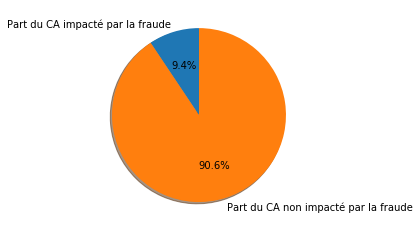

In [0]:
total_fraude = Fraude['purchase_value'].sum()
total_ventes = dataset['purchase_value'].sum()
total_ventes_reglos = total_ventes - total_fraude

labels = "Part du CA impacté par la fraude","Part du CA non impacté par la fraude"
sizes = [total_fraude,total_ventes_reglos]
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

*Il y a environ 9.4 % des transactions frauduleuses dans notre dataset*

In [0]:
print("Les ventes impactées par la fraude s'élèvent à :" , total_fraude,"$")
print("Pour comparaison, les ventes totales s'élèvent elle à :" , total_ventes ,"$")

Les ventes impactées par la fraude s'élèvent à : 523488 $
Pour comparaison, les ventes totales s'élèvent elle à : 5581378 $


*### On observe les pays où il y a le plus de cas frauduleux* 

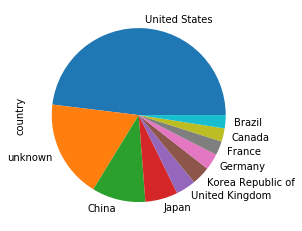

In [0]:
dataset.country.value_counts()[dataset.country.value_counts() >2000].plot(kind="pie")

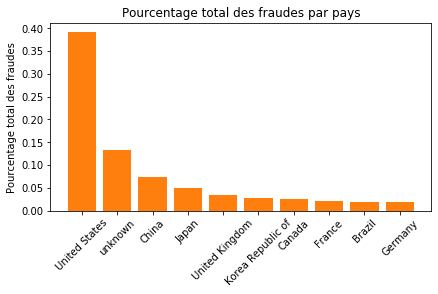

In [0]:
total = dataset['class'].sum()
dataset_country = dataset.groupby('country').sum()
sorted_country_fraud = dataset_country['class'].sort_values(ascending=False)
    
y1 = sorted_country_fraud[:10]/float(total)
x = np.arange(len(y1))
    
fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y1)
ax.set_ylabel('Pourcentage total des fraudes')
ax.set_title('Pourcentage total des fraudes par pays')
ax.set_xticks(x)
ax.set_xticklabels(sorted_country_fraud.index.values[:10], rotation=45)
ax.grid(False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('Pourcentage total des fraudes par pays')

*On a environ 22 000 de toutes les adresses IP appariées provenaient d'un pays "inconnu". Avec environ 14 000 transactions frauduleuses. 39% des événements frauduleux provenaient d'adresses IP aux États-Unis et 13% provenaient d'un pays "inconnu". Pour cette raison, On a choisi de ne pas inclure le pays d'un utilisateur en tant qu'élément de prédiction de la fraude*

In [0]:
# Dummification : On crée des variables nominales pour les fonctionnalités catégorielles
cols = ['source', 'browser', 'country']
dataset1 = pd.get_dummies(dataset, columns=cols)

In [0]:
from sklearn.model_selection import train_test_split
y = dataset1['class']
X = dataset1.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

## *NORMALISATION*

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##*REGRESSION LOGISTIQUE*

In [0]:
from sklearn.linear_model import LogisticRegression
LogisReg = LogisticRegression(class_weight='balanced')
LogisReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
LogisReg.score(X_test, y_test)

0.6476785430673937

In [0]:
y_pred = LogisReg.predict(X_test)

### **La matrice de confusion de nos prédictions sur l’échantillon de test et d’apprentissage**

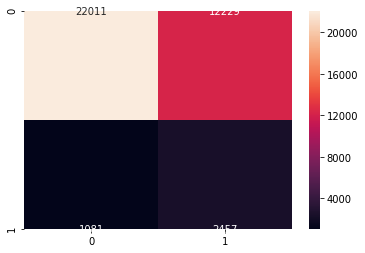

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

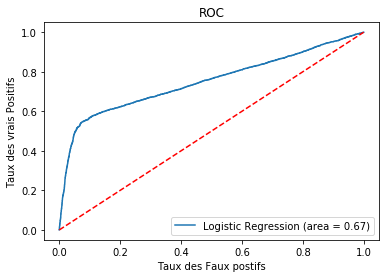

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogisReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogisReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taux des Faux postifs')
plt.ylabel('Taux des vrais Positifs')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## RANDOM FOREST REGRESSOR

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = rf.score(X_test, y_test)

In [0]:
accuracy

0.9520091058287893

In [0]:
f1

0.675264194877306

In [0]:
recall

0.5327868852459017

# CONCLUSION

*En conclusion, nous devons prendre en compte les coûts de la prévision de la fraude quand elle se produit réellement, de la prédire quand elle ne s'est pas produite et de la non prévision de la fraude quand elle s'est réellement produite. Si nous prévoyons qu'une transaction n'est pas frauduleuse, on risque de perdre de l'argent et la confiance de nos clients. Lorsque nous prévoyons qu'une transaction est frauduleuse alors que ce n'est pas le cas, nous risquons de perdre la confiance. Pour ces raisons, nous souhaitons nous concentrer sur les rappels afin de minimiser les prédictions des faux negatifs et sur la précision des prédictions de fraudes faux positifss. Le modèle prédit actuellement avec une précision de 95% et un rappel de 53%.*